In [23]:
import json, os, sys, numbers, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
sys.path.append("../scripts/")
from collections import defaultdict, Counter
from pprint import pprint
from helper import *

In [8]:
def rel_error(pred, gth, abs_err=False):
    pred, gth = float(pred), float(gth)
    if gth == 0: res = pred-gth
    else: res = (pred - gth) / np.absolute(gth)
    if abs_err: res = np.absolute(res)
    return res

In [2]:
llm_rel_path = "codegen25-7b-instruct"
results = pd.read_csv(
    f"../data/lila/results/{llm_rel_path}/iid_test_single_ans.csv", 
    header=0, 
    keep_default_na=False # prevent from reading empty strings as nan
)

print(len(results))
results.head(5)

5342


,id,gth_ans,exec_ans_var_a,em_var_a,exec_ans_deffunc,em_deffunc
0,0,370.000000,,0,,0
1,1,-5.000000,,0,SyntaxError,0
2,2,0.004494,,0,SyntaxError,0
3,3,0.000000,-16,0,,0
4,4,1.020000,1.02,1,1.02,1


In [24]:
rel_errors = {
    "var_a =": [],
    "def func(": [],
}
abs_err = True
for i in range(len(results)):
    d = results.loc[i].to_dict()
    gth = d['gth_ans']
    x = d["id"]
    try:
        pred = float(d["exec_ans_var_a"])
        if not math.isinf(pred):
            rel_errors["var_a ="].append(rel_error(pred, gth, abs_err))
    except ValueError: pass
    except: raise
    try:
        pred = float(d["exec_ans_deffunc"])
        if not math.isinf(pred):
            rel_errors["def func("].append(rel_error(pred, gth, abs_err))
    except ValueError: pass
    except: raise
    
for k, v in rel_errors.items():
    print(k, len(v))

var_a = 3798
def func( 2466


var_a = 2578
def func( 2018


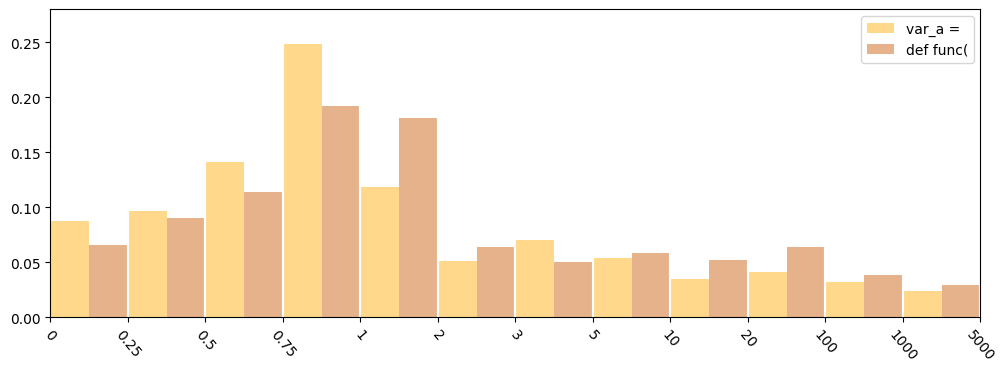

In [65]:
fig, ax = plt.subplots(figsize=(12, 4))
colors = iter(['#ffb21a', '#cc661a'])
bar_types = 2
ticks = [
            0,
            0.25, 0.5, 0.75, 1, 2, 3, 5, 10,
            20, 100, 1000, 5000
        ]
for i, k in enumerate(rel_errors.keys()):
    v = rel_errors[k]
    
    values = [_v for _v in v if not -0.001 < _v < 0.001]
    print(k, len(values))    
    bins = [np.min(values)] + ticks[1:-1] + [np.max(values)]
    frq, edges = np.histogram(values, bins=bins)
    edges = [0] + list(edges)[1:-1] + [ticks[-1]]

    edges_ = [0]
    frq_ = [0]
    prev_e = 0
    for f, e in zip(frq, list(range(1, len(edges)))): 
        edges_.extend([
            prev_e + i/bar_types,
            prev_e + (i+1)/bar_types
        ])
        frq_.extend([f/len(values), 0])
        prev_e = e
    edges_.append(edges[-1])

    ax.stairs(frq_, edges_, fill=True, color=next(colors), alpha=0.5, label=k)
    ax.vlines(list(range(len(ticks))), 0, frq.max(), colors='w')
plt.ylim((0, 0.28))
plt.xlim((0, len(ticks)-1))
plt.xticks(list(range(len(ticks))), ticks, rotation=310)
plt.legend()
plt.show()


In [31]:
max(rel_errors['var_a ='])

1.204428152e+24